In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

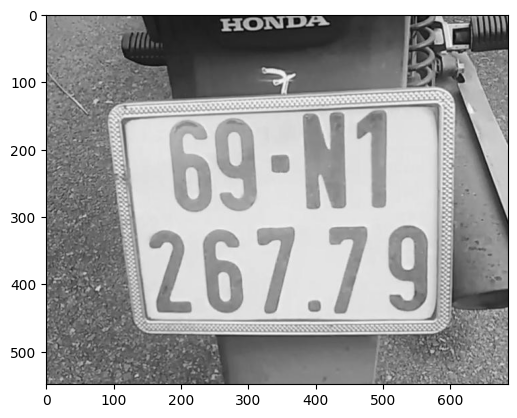

In [2]:
img = cv2.imread('choi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

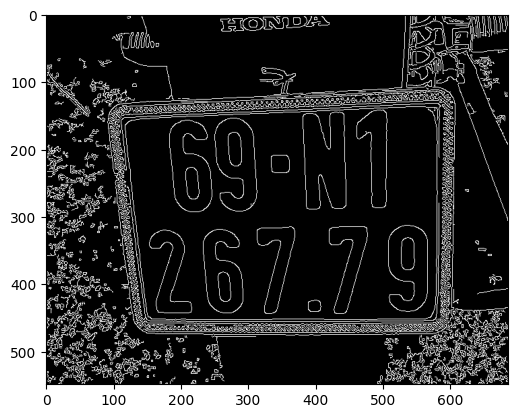

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
# location = None
# for contour in contours:
#     approx = cv2.approxPolyDP(contour, 10, True)
#     if len(approx) == 4:
#         location = approx
#         break
location = None
for contour in contours:
    # Dùng approxPolyDP để xấp xỉ đa giác
    approx = cv2.approxPolyDP(contour, 15, True)
    if len(approx) == 4:  # Chỉ lấy các contour có 4 cạnh
        # Tính toán kích thước và tỷ lệ khung hình
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        # Điều kiện cho cả biển số ô tô (dài) và xe máy (gần vuông)
        if (2.0 < aspect_ratio < 5.0) or (0.8 < aspect_ratio < 1.5):  # Ô tô: 2-5, Xe máy: 0.8-1.5
            location = approx
            break

In [31]:
location

In [32]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2426: error: (-215:Assertion failed) p.checkVector(2, CV_32S) > 0 in function 'cv::fillPoly'


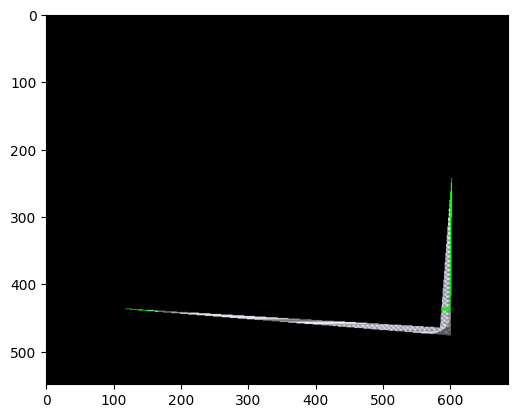

In [23]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [24]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

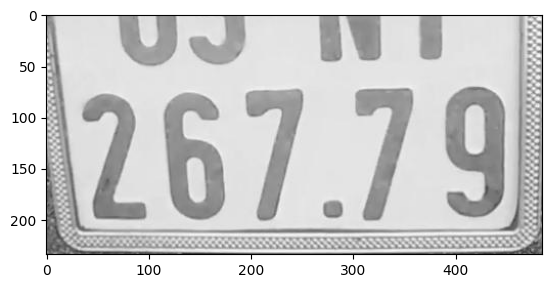

In [25]:

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [26]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[np.int32(70), 0],
   [np.int32(204), 0],
   [np.int32(204), np.int32(50)],
   [np.int32(70), np.int32(50)]],
  'Wo',
  np.float64(0.6800347701139905)),
 ([[np.int32(25), np.int32(55)],
   [np.int32(465), np.int32(55)],
   [np.int32(465), np.int32(215)],
   [np.int32(25), np.int32(215)]],
  '267.79',
  np.float64(0.602513715960669))]

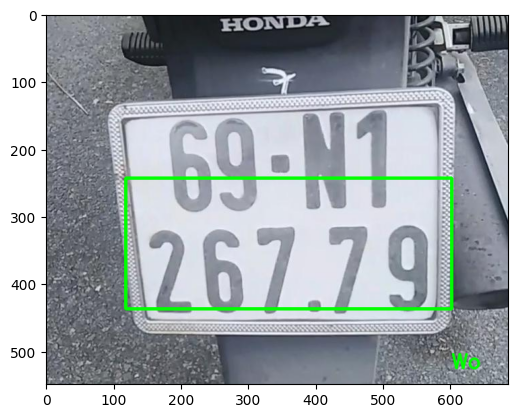

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))